# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Zach Fuller

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## GitHub Repo: https://github.com/HundredDucks/44620_Module7

## Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
#import modules needed for this assignment first
import requests
from bs4 import BeautifulSoup
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
r = requests.get('https://www.npr.org/2022/11/18/1137819206/twitter-shutting-down-likelihood')

with open('twitter_article.pkl', 'wb') as f:
    pickle.dump(r.text, f)

## Question 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [3]:
with open('twitter_article.pkl', 'rb') as f:
    article_html = pickle.load(f)

In [4]:
soup = BeautifulSoup(article_html, 'html5lib')

In [5]:
article_content = soup.find('article')

In [22]:
#confirming that the right section of the article was retrieved. The whole article is in here, as well as some embeded images. Not sure how to ignore those?
#print(article_content.get_text())

In [14]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [23]:
doc = nlp(article_content.get_text())
print("Sentiment Analysis:", doc._.blob.sentiment_assessments.assessments)

Sentiment Analysis: [(['likely'], 0.0, 1.0, None), (['complete'], 0.1, 0.4, None), (['likely'], 0.0, 1.0, None), (['complete'], 0.1, 0.4, None), (['more'], 0.5, 0.5, None), (['social'], 0.03333333333333333, 0.06666666666666667, None), (['new'], 0.13636363636363635, 0.45454545454545453, None), (['social'], 0.03333333333333333, 0.06666666666666667, None), (['new'], 0.13636363636363635, 0.45454545454545453, None), (['last'], 0.0, 0.06666666666666667, None), (['final'], 0.0, 1.0, None), (['few'], -0.2, 0.1, None), (['unlikely'], -0.5, 0.5, None), (['down'], -0.15555555555555559, 0.2888888888888889, None), (['entirely'], 0.0, 0.625, None), (['big'], 0.0, 0.1, None), (['such'], 0.0, 0.5, None), (['more'], 0.5, 0.5, None), (['new'], 0.13636363636363635, 0.45454545454545453, None), (['fresh'], 0.3, 0.5, None), (['half'], -0.16666666666666666, 0.16666666666666666, None), (['publicly'], 0.0, 0.06666666666666667, None), (['possible'], 0.0, 1.0, None), (['former'], 0.0, 0.0, None), (['new'], 0.136

### Polarity Score

In [24]:
print("Polarity Score:", doc._.blob.polarity)

Polarity Score: 0.013526951849320273


### Number of Sentences

In [34]:
#wasn't quite sure the best way to do this, so had to do some Googling. Came upon something similar to this, seemed to work well.
with open(r"twitter_article.pkl", 'r') as fp:
    lines = len(fp.readlines())
    print('Total Number of lines:', lines)

Total Number of lines: 729


## Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [35]:
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

In [36]:
interesting_tokens = [token for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print("The 5 most common tokens are " + str(word_freq.most_common(5)).lower())

The 5 most common tokens are [('twitter', 27), ('musk', 12), ('nurphoto', 6), ('elon', 5), ('platform', 5)]


## Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [37]:
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print("The 5 most common lemmas and their counts are " + str(lemma_freq.most_common(5)))

The 5 most common lemmas and their counts are [('twitter', 27), ('musk', 12), ('employee', 10), ('nurphoto', 6), ('say', 6)]


## Question 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [40]:
frequent_tokens = set()
for token, freq in word_freq.most_common(5):
    frequent_tokens.add(token)
print(frequent_tokens)

{'Elon', 'Musk', 'NurPhoto', 'platform', 'Twitter'}


In [41]:
def token_list(sentence, interesting_token):
    sentences = list(sentence.sents)
    scores = list()
    for sentence in sentences:
        word_count_t = 0
        count_t = 0
        for word in sentence:
            if not(word.is_space or word.is_punct):
                word_count_t += 1
        for token in sentence:
            if token.lemma_.lower() in frequent_tokens:
                count_t += 1
        if count_t != 0:
            token_score = count_t/word_count_t
        else:
            token_score = 0
        scores.append(token_score)
    return scores

In [43]:
tokens_data = token_list(doc, frequent_tokens)

[Text(0.5, 0, 'Score'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Frequency of Token Scores per Sentence')]

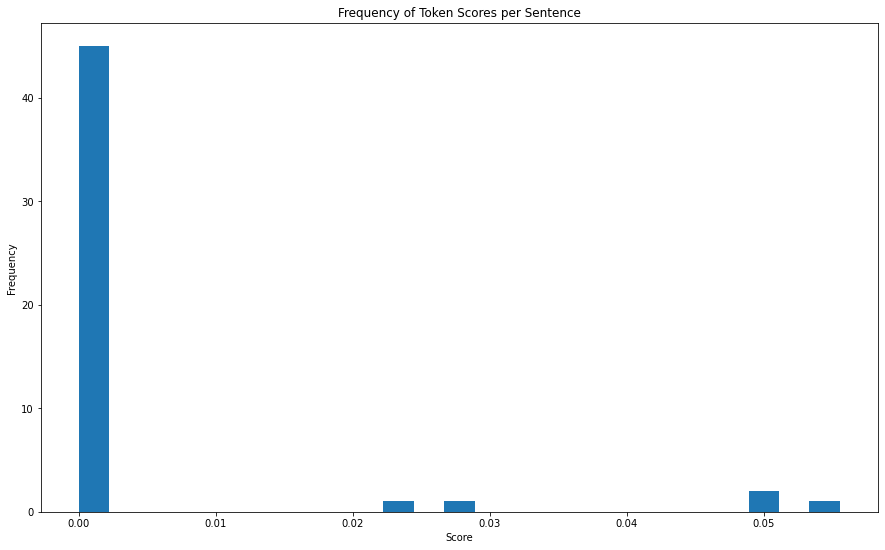

In [44]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.hist(tokens_data, bins=25)
ax.set(xlabel='Score', ylabel='Frequency', title='Frequency of Token Scores per Sentence')

In [45]:
#The most common token score range seems to be about 0 - 0.0025

## Question 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [46]:
frequent_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    frequent_lemmas.add(lemma)
print(frequent_lemmas)

{'musk', 'say', 'employee', 'twitter', 'nurphoto'}


In [47]:
def lemma_list(sentence, interesting_lemmas):
    sentences = list(sentence.sents)
    scores = list()
    for sentence in sentences:
        word_count_l = 0
        count_l = 0
        for word in sentence:
            if not(word.is_space or word.is_punct):
                word_count_l += 1
        for lemma in sentence:
            if lemma.lemma_.lower() in frequent_lemmas:
                count_l += 1
        if count_l != 0:
            lemma_score = count_l/word_count_l
        else:
            lemma_score = 0
        scores.append(lemma_score)
    return scores

In [48]:
lemmas_data = lemma_list(doc, frequent_lemmas)

[Text(0.5, 0, 'Score'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Frequency of Lemma Scores per Sentence')]

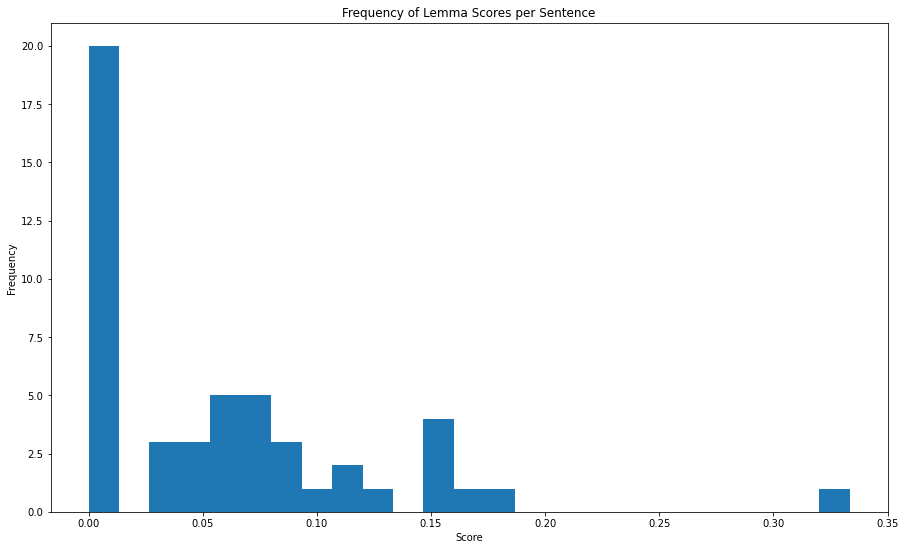

In [49]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.hist(lemmas_data, bins=25)
ax.set(xlabel='Score', ylabel='Frequency', title='Frequency of Lemma Scores per Sentence')

In [50]:
#The most common score range seems to be about 0 - 0.01

## Question 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [167]:
#The Cutoff Score for tokens: Likely around 0.002
#The Cutoff Score for lemmas: I initially thought it would be around 0.05, but after working on question 10, I found 0.15 to be more suitable to give me an appropriate line count

## Question 8

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [156]:
def token_score_list(sentence, interesting_token):
    sentences = list(sentence.sents)
    scores = list()
    sentence_list = list()
    for sentence in sentences:
        word_count_t = 0
        count_t = 0
        for word in sentence:
            if not(word.is_space or word.is_punct):
                word_count_t += 1
        for token in sentence:
            if token.lemma_.lower() in frequent_tokens:
                count_t += 1
        if count_t != 0:
            token_score = count_t/word_count_t
        else:
            token_score = 0
        if token_score >= 0.002:
            sentence_list.append(sentence)
    return sentence_list

In [157]:
token_score_list(doc, frequent_tokens)

[NurPhoto/NurPhoto via Getty Images
             
         
     
 
    
    People are singing their last birdsongs on Twitter, as some brace for what they fear will be a final farewell to the platform whose workforce has shrunk dramatically in the few weeks it's been owned by billionaire Elon Musk.   ,
 Untangling Disinformation 
             Twitter employees quit in droves after Elon Musk's ultimatum passes
          
          
 
       
       
 
    
    
 
    Plus, there are concerns about the platform's capacity to handle traffic during big events, such as the World Cup kicking off this weekend.   ,
 While the platform is still functioning, many warn features may deteriorate as the site is run by a threadbare team.   ,
 With security, engineering and content moderation teams gutted, the platform is also more vulnerable to hacks and abuse.   ,
 Twitter is a platform that is "so complicated that truly nobody understands how it all works," another former employee said.]

## Question 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [158]:
token_summary = str(token_score_list(doc, frequent_tokens))

In [159]:
doc_token = nlp(token_summary)
print("Sentiment Analysis:", doc_token._.blob.sentiment_assessments.assessments)

Sentiment Analysis: [(['last'], 0.0, 0.06666666666666667, None), (['final'], 0.0, 1.0, None), (['few'], -0.2, 0.1, None), (['big'], 0.0, 0.1, None), (['such'], 0.0, 0.5, None), (['many'], 0.5, 0.5, None), (['more'], 0.5, 0.5, None), (['vulnerable'], -0.5, 0.5, None), (['complicated'], -0.5, 1.0, None), (['former'], 0.0, 0.0, None)]


### Polarity Score

In [160]:
print("Polarity Score:", doc_token._.blob.polarity)

Polarity Score: -0.019999999999999997


In [161]:
#I was having trouble getting a line count to work, so I just wrote the str result of the function I wrote in question 8 to a pkl file and read it in the following line
#so that .readlines would work
with open('question8.pkl', 'wb') as fx:
        pickle.dump(token_summary, fx)

### Number of Lines

In [162]:
with open(r"question8.pkl", 'r') as fp:
    lines_token_summary = len(fp.readlines())
    print('Total Number of lines:', lines_token_summary)

Total Number of lines: 18


## Question 10

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [165]:
def lemma_score_list(sentence, interesting_lemmas):
    sentences = list(sentence.sents)
    scores = list()
    sentence_l_list = list()
    for sentence in sentences:
        word_count_l = 0
        count_l = 0
        for word in sentence:
            if not(word.is_space or word.is_punct):
                word_count_l += 1
        for lemma in sentence:
            if lemma.lemma_.lower() in frequent_lemmas:
                count_l += 1
        if count_l != 0:
            lemma_score = count_l/word_count_l
        else:
            lemma_score = 0
        if lemma_score >= 0.15:
            sentence_l_list.append(sentence)
    return sentence_l_list

In [166]:
lemma_score_list(doc, frequent_lemmas)

[Facebook
          Twitter
          Flipboard
          Email
       
    
    
 
 
 
 
 
       
             
     
             November 18, 20226:56 PM ET
     
 
    
    
 
    
             
                   
                         
                               
 
   
     
       Mary Yang
     
   
 
     
       Twitter
     
                
     
       
         
       
     
 
   
     
       Shannon Bond
     
   
 
     
       Twitter
     
 
             
          
          
 
       
    
    
 
 
 
 
 
       
       How likely is a complete Twitter meltdown?,
 NurPhoto/NurPhoto via Getty Images
                     
                 
                 hide caption
             
         
 
 
             toggle caption
     
 
     
         
         NurPhoto/NurPhoto via Getty Images
         
     
 
 
     
         
             
             
             
         
     
 
 
     
         The departures of thousands of Twitter workers is raising 

## Question 11

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [168]:
lemma_summary = str(lemma_score_list(doc, frequent_lemmas))

In [170]:
doc_lemma = nlp(lemma_summary)
print("Sentiment Analysis:", doc_lemma._.blob.sentiment_assessments.assessments)

Sentiment Analysis: [(['likely'], 0.0, 1.0, None), (['complete'], 0.1, 0.4, None), (['social'], 0.03333333333333333, 0.06666666666666667, None), (['new'], 0.13636363636363635, 0.45454545454545453, None), (['former'], 0.0, 0.0, None), (['new'], 0.13636363636363635, 0.45454545454545453, None), (['former'], 0.0, 0.0, None), (['following'], 0.0, 0.1, None), (['complicated'], -0.5, 1.0, None), (['former'], 0.0, 0.0, None), (['social'], 0.03333333333333333, 0.06666666666666667, None)]


### Polarity Score

In [171]:
print("Polarity Score:", doc_lemma._.blob.polarity)

Polarity Score: -0.005509641873278241


In [172]:
with open('question10.pkl', 'wb') as fx:
        pickle.dump(lemma_summary, fx)

### Number of Lines

In [173]:
with open(r"question10.pkl", 'r') as fp:
    lines_lemma_summary = len(fp.readlines())
    print('Total Number of lines:', lines_lemma_summary)

Total Number of lines: 125


## Question 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  
The Polarity Score of the original article is 0.013526951849320273.
The Polarity Score of the token summary is -0.019999999999999997.
The Polarity Score of the lemma summary is -0.005509641873278241.
All of these scores are very close to neutral. However, the key difference is that the original article had a very low but still positive score, while the summaries had a very low but negative score. Since the summaries were based on filtering out sentences containing the most frequent tokens and lemmas, there were less sentences to analyze, meaning that the sentiment/polarity can easily be swayed positively or negatively, as the score of each individual word can have more weight when there are fewer total words in the article. Additionally, this article is about a currently hot topic, meaning that the key tokens/lemmas (Twitter, Elon, etc.) are likely to be included in somewhat sensationalized sentences. I think that this can sway the scores to be more negative.

## Question 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

The scores for both the lemma and token summaries are similar values (-0.005 vs -0.019). However, my overall understanding of the article was that it was rather negative, so I think the token summary is a better reflection of my interpreted sentiment of the article. It appears that the frequent tokens included more proper nouns (specifically names), while the frequent lemmas were more broad (likely interpreting the name Musk as an adjective as opposed to a proper noun). I think that the use of the frequent tokens/proper nouns were included in rather sensationalized sentences, meaning that the token sentiment analysis likely picked up more sensationalized (and therefore negative) sentences in general.